## Common Training/Validation Workflow

In [6]:
from ultralytics import YOLO
from IPython.display import Image
import cv2
import time

### Dataset Download

- Roboflow Universe Dataset  
Download the dataset using Roboflow API through this [link](https://universe.roboflow.com/text-detector/text-detector-2/dataset/2).  
The dataset will be stored at `datasets/{project-name}`. Roboflow provides ready to use dataset complete with splits and annotations.  
Below is example code to download dataset to local.

In [ ]:
# from roboflow import Roboflow

# rf = Roboflow(api_key="0n9ducziAw8kQIGHk25M")
# project = rf.workspace("text-detector").project("text-detector-2")
# dataset = project.version(2).download("yolov8")

- Custom Dataset  
For the custom dataset, I will use the Kaggle [TextOCR](https://www.kaggle.com/datasets/robikscube/textocr-text-extraction-from-images-dataset) dataset.  
Download the dataset (roughly 7 GB) and store it in the `datasets` directory.  
Make sure to organize the files and folders accordingly.

Create custom YOLOv8 data generator using the `yolov8datagen.py` script. Use the following script to generate custom dataset with YOLOv8 from the downloaded Kaggle dataset.

```
python yolov8datagen.py --source_dir --dest_dir --total_images --density --split
```

Refer to `yolov8datagen.py` for full script arguments and outputs.

### Check GPU Compatibility

In [1]:
!nvidia-smi

Thu Jan 25 15:42:43 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P5    14W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Training Loop

The training loop of YOLOv8 using Ultralytics API is fairly simple:

1. Initialize the YOLO model and its specified architecture. (`yolov8n.pt` refers to the nano-sized model; refer to [this link](https://docs.ultralytics.com/modes/) for more information.)  
   - the code will download the pretrained weights if not already existed.

2. Use the `train` method with the following arguments:
   - `data`: This should point to our source, which should be a `data.yaml` file stored in the `datasets` directory.

3. Set hyperparameters and device (use 0 for CUDA) and save the results.
   - setting the `optimizer` arguments to `auto` (the default) will let YOLO decide the best value for some hyperparameters such as learning rate and momentum.


In [3]:
model = YOLO('yolov8n.pt')
results = model.train(data='datasets\Text-Detector-2-2\data.yaml', epochs=20, imgsz=640, device=0, batch=4)

New https://pypi.org/project/ultralytics/8.1.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.0 🚀 Python-3.8.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets\Text-Detector-2-2\data.yaml, epochs=20, time=None, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning D:\Projects\YOLO\datasets\Text-Detector-2-2\train\labels.cache... 2683 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2683/2683 [00:00<?, ?it/s]
val: Scanning D:\Projects\YOLO\datasets\Text-Detector-2-2\valid\labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       1.9G      2.134      1.589      1.188        321        640: 100%|██████████| 671/671 [04:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.64it/s]

                   all        264      32259      0.587       0.39      0.428       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.96G      1.898      1.222      1.084        369        640: 100%|██████████| 671/671 [04:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:21<00:00,  1.54it/s]

                   all        264      32259      0.664      0.441      0.508      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.17G      1.822      1.158       1.06        231        640: 100%|██████████| 671/671 [04:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.64it/s]

                   all        264      32259      0.697      0.456       0.53      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.1G      1.772      1.109      1.042        444        640: 100%|██████████| 671/671 [04:49<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.63it/s]

                   all        264      32259      0.693      0.477      0.553      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.66G       1.73      1.087      1.034       1391        640: 100%|██████████| 671/671 [04:47<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.71it/s]

                   all        264      32259      0.715       0.48      0.563      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.29G      1.681      1.046      1.018        757        640: 100%|██████████| 671/671 [04:48<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.69it/s]

                   all        264      32259       0.72      0.475      0.568      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.71G      1.664      1.028      1.013        576        640: 100%|██████████| 671/671 [04:49<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.70it/s]

                   all        264      32259      0.717      0.482      0.564      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.65G      1.621      1.002      1.006       1005        640: 100%|██████████| 671/671 [04:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.67it/s]

                   all        264      32259      0.736      0.494      0.583      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.18G      1.623      0.998      1.004        767        640: 100%|██████████| 671/671 [04:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.62it/s]

                   all        264      32259      0.747      0.495      0.588      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.47G      1.564     0.9557     0.9872        521        640: 100%|██████████| 671/671 [04:42<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.68it/s]

                   all        264      32259      0.713      0.507      0.593      0.359


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.33G      1.589      1.007      1.005        455        640: 100%|██████████| 671/671 [04:10<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.62it/s]

                   all        264      32259      0.728      0.507      0.593      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.6G      1.561     0.9845     0.9983        325        640: 100%|██████████| 671/671 [04:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.68it/s]

                   all        264      32259      0.739      0.512      0.598      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.34G      1.539      0.959     0.9916        234        640: 100%|██████████| 671/671 [04:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.63it/s]

                   all        264      32259      0.734      0.517      0.605      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.03G      1.531     0.9519     0.9904        430        640: 100%|██████████| 671/671 [04:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.70it/s]

                   all        264      32259      0.738      0.519      0.608      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.15G      1.506     0.9294      0.981        180        640: 100%|██████████| 671/671 [04:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.68it/s]

                   all        264      32259      0.742      0.519      0.611      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.18G      1.492     0.9282     0.9804        274        640: 100%|██████████| 671/671 [04:10<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.63it/s]

                   all        264      32259      0.743       0.52      0.612      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       3.5G      1.481     0.9189     0.9779        443        640: 100%|██████████| 671/671 [04:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.70it/s]

                   all        264      32259      0.748      0.529      0.615      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.54G      1.468     0.9003     0.9706        399        640: 100%|██████████| 671/671 [04:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.60it/s]

                   all        264      32259      0.745      0.528      0.616      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.74G       1.45     0.8867     0.9687        494        640: 100%|██████████| 671/671 [04:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.67it/s]

                   all        264      32259      0.741      0.536      0.622       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.62G      1.432     0.8718     0.9618        289        640: 100%|██████████| 671/671 [04:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:20<00:00,  1.62it/s]

                   all        264      32259      0.752      0.532      0.623      0.391



20 epochs completed in 1.616 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.8.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.40it/s]


                   all        264      32259      0.752      0.532      0.623      0.391
Speed: 1.5ms preprocess, 18.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\detect\train2


## Training Evaluation

The training results evaluationa re auto-generated by YOLO and can be found on `runs` directory as default. Below are some important results to analyze.

- `confusion_matrix.png` to check prediction/ground truth result matrix. For text detection there are only one class (`text`).  
some important thing to note is the precision/recall to handle class imbalance

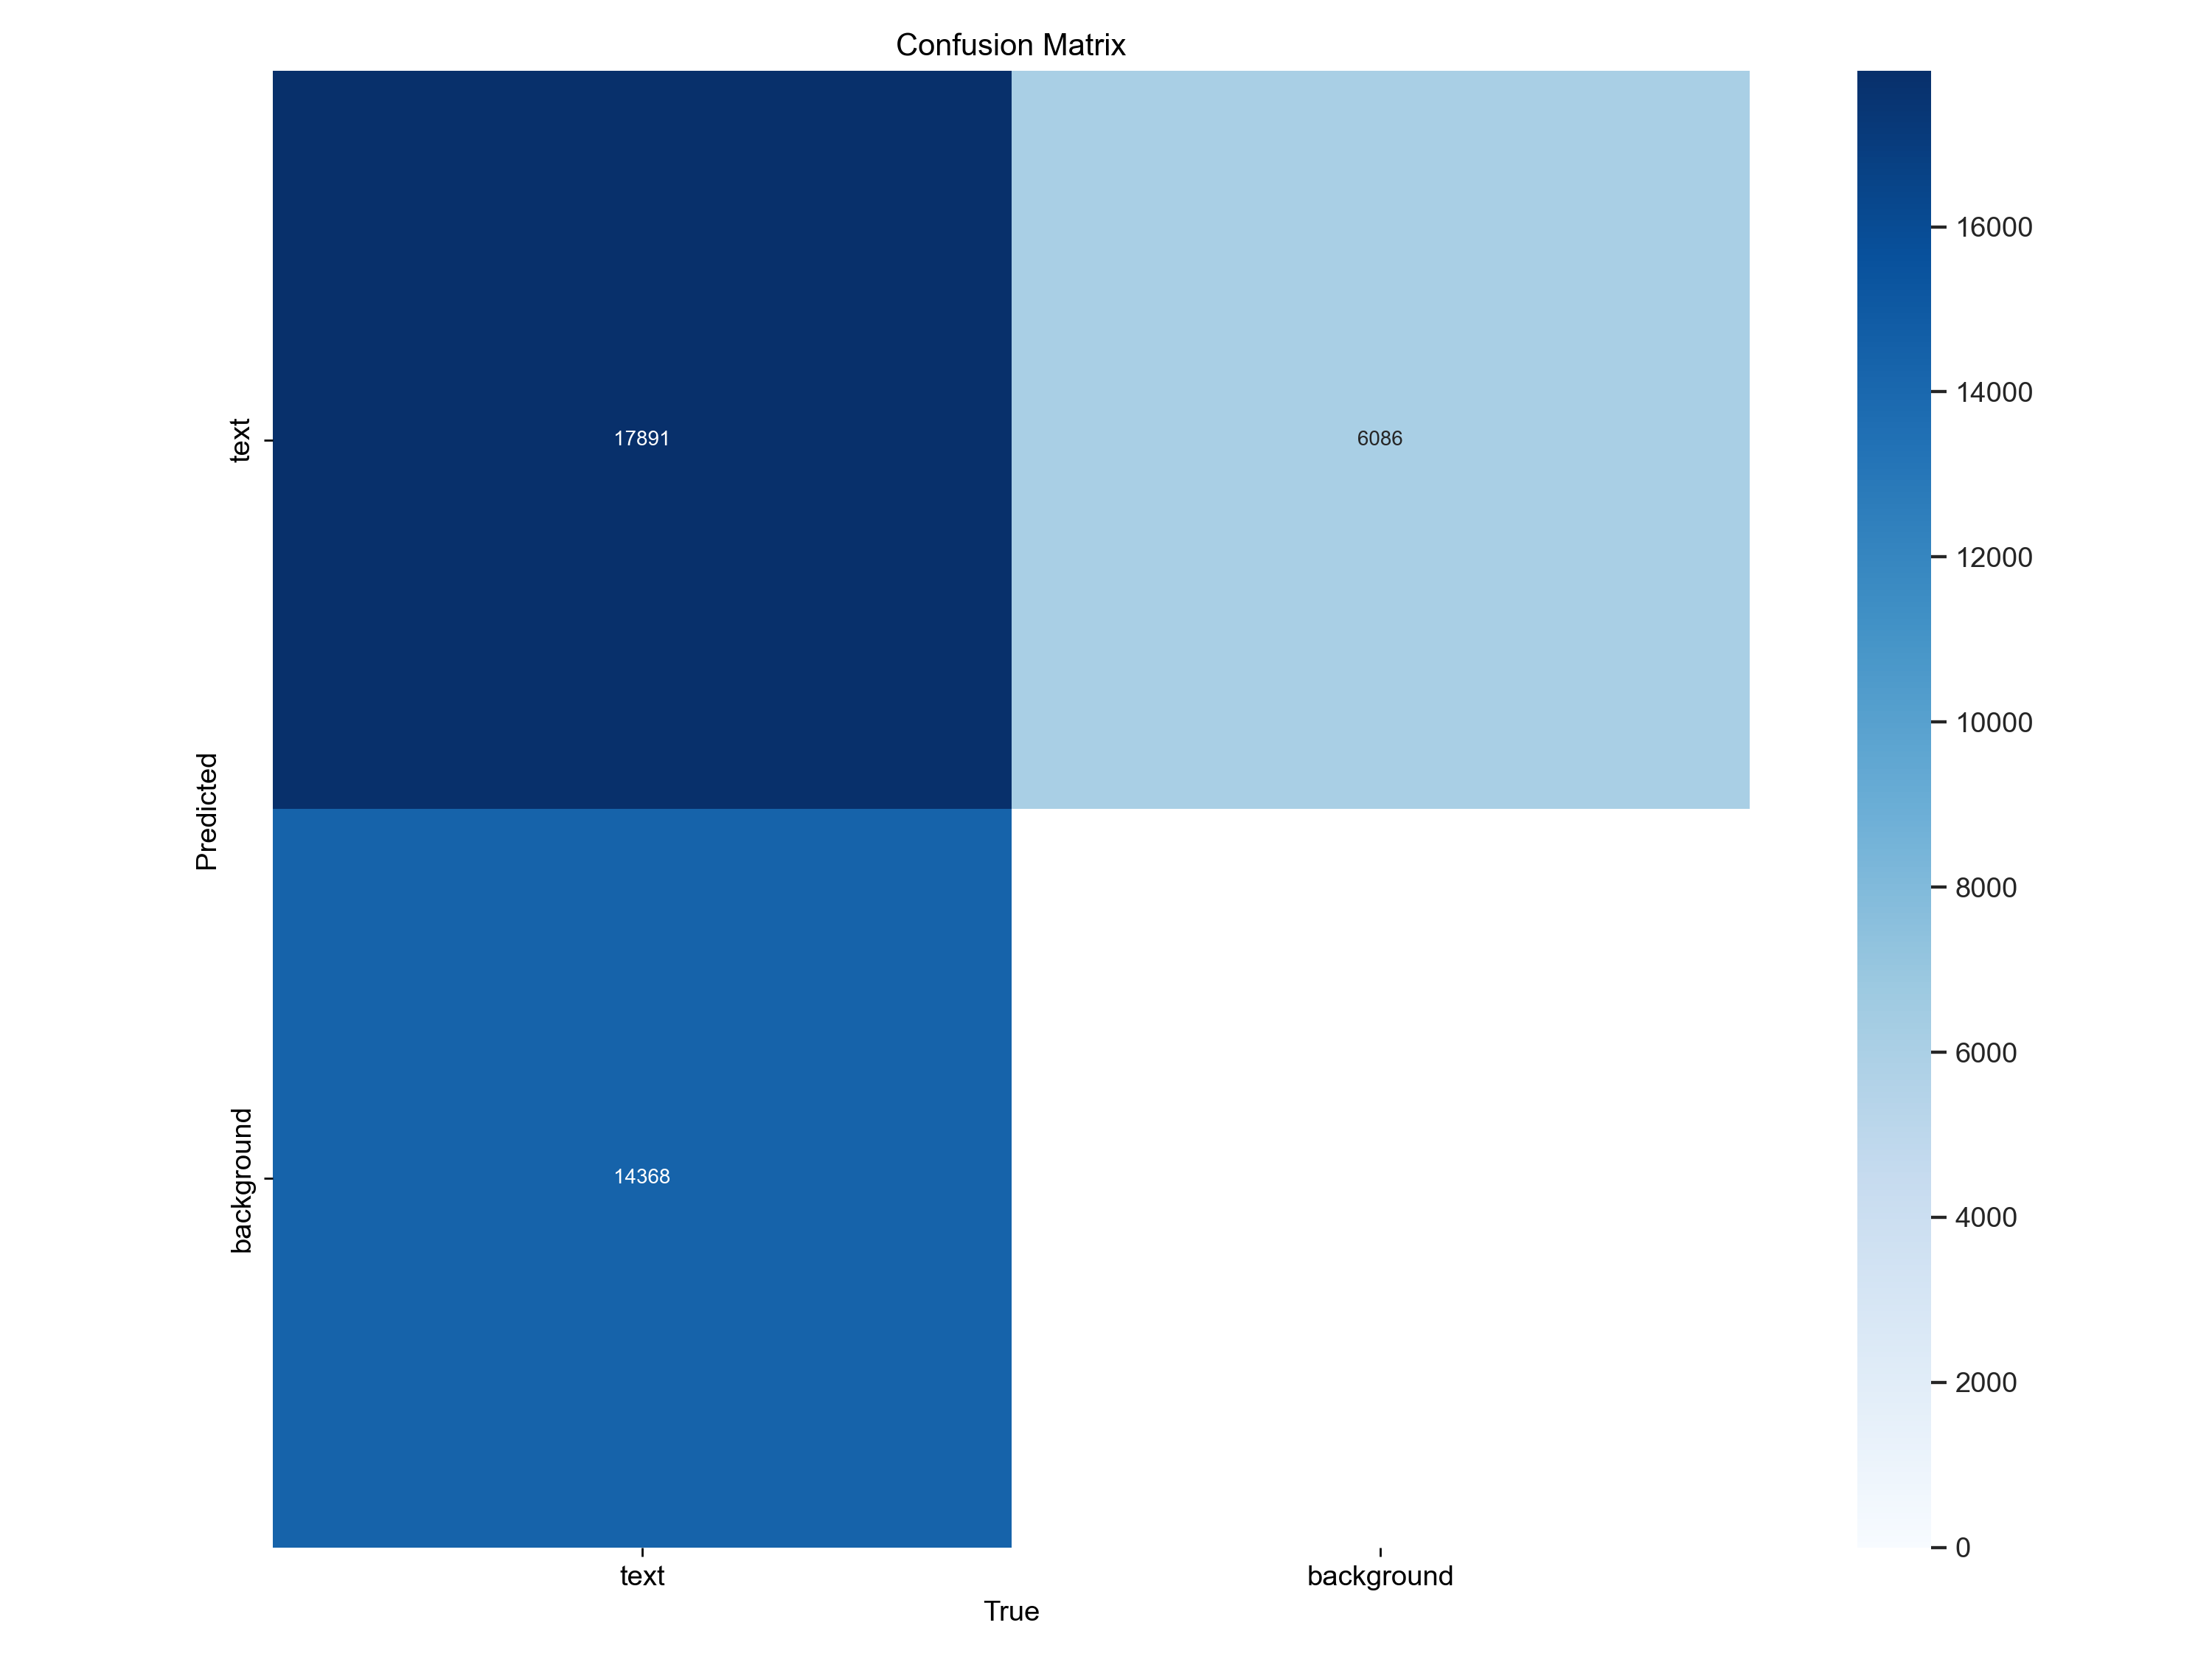

In [5]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

- `results.png` shows the plot of different metrics for each training epochs. The loss function used is `box_loss`.  
Common evaluation metric is mAP which calculates area under Precision-Recall curve.

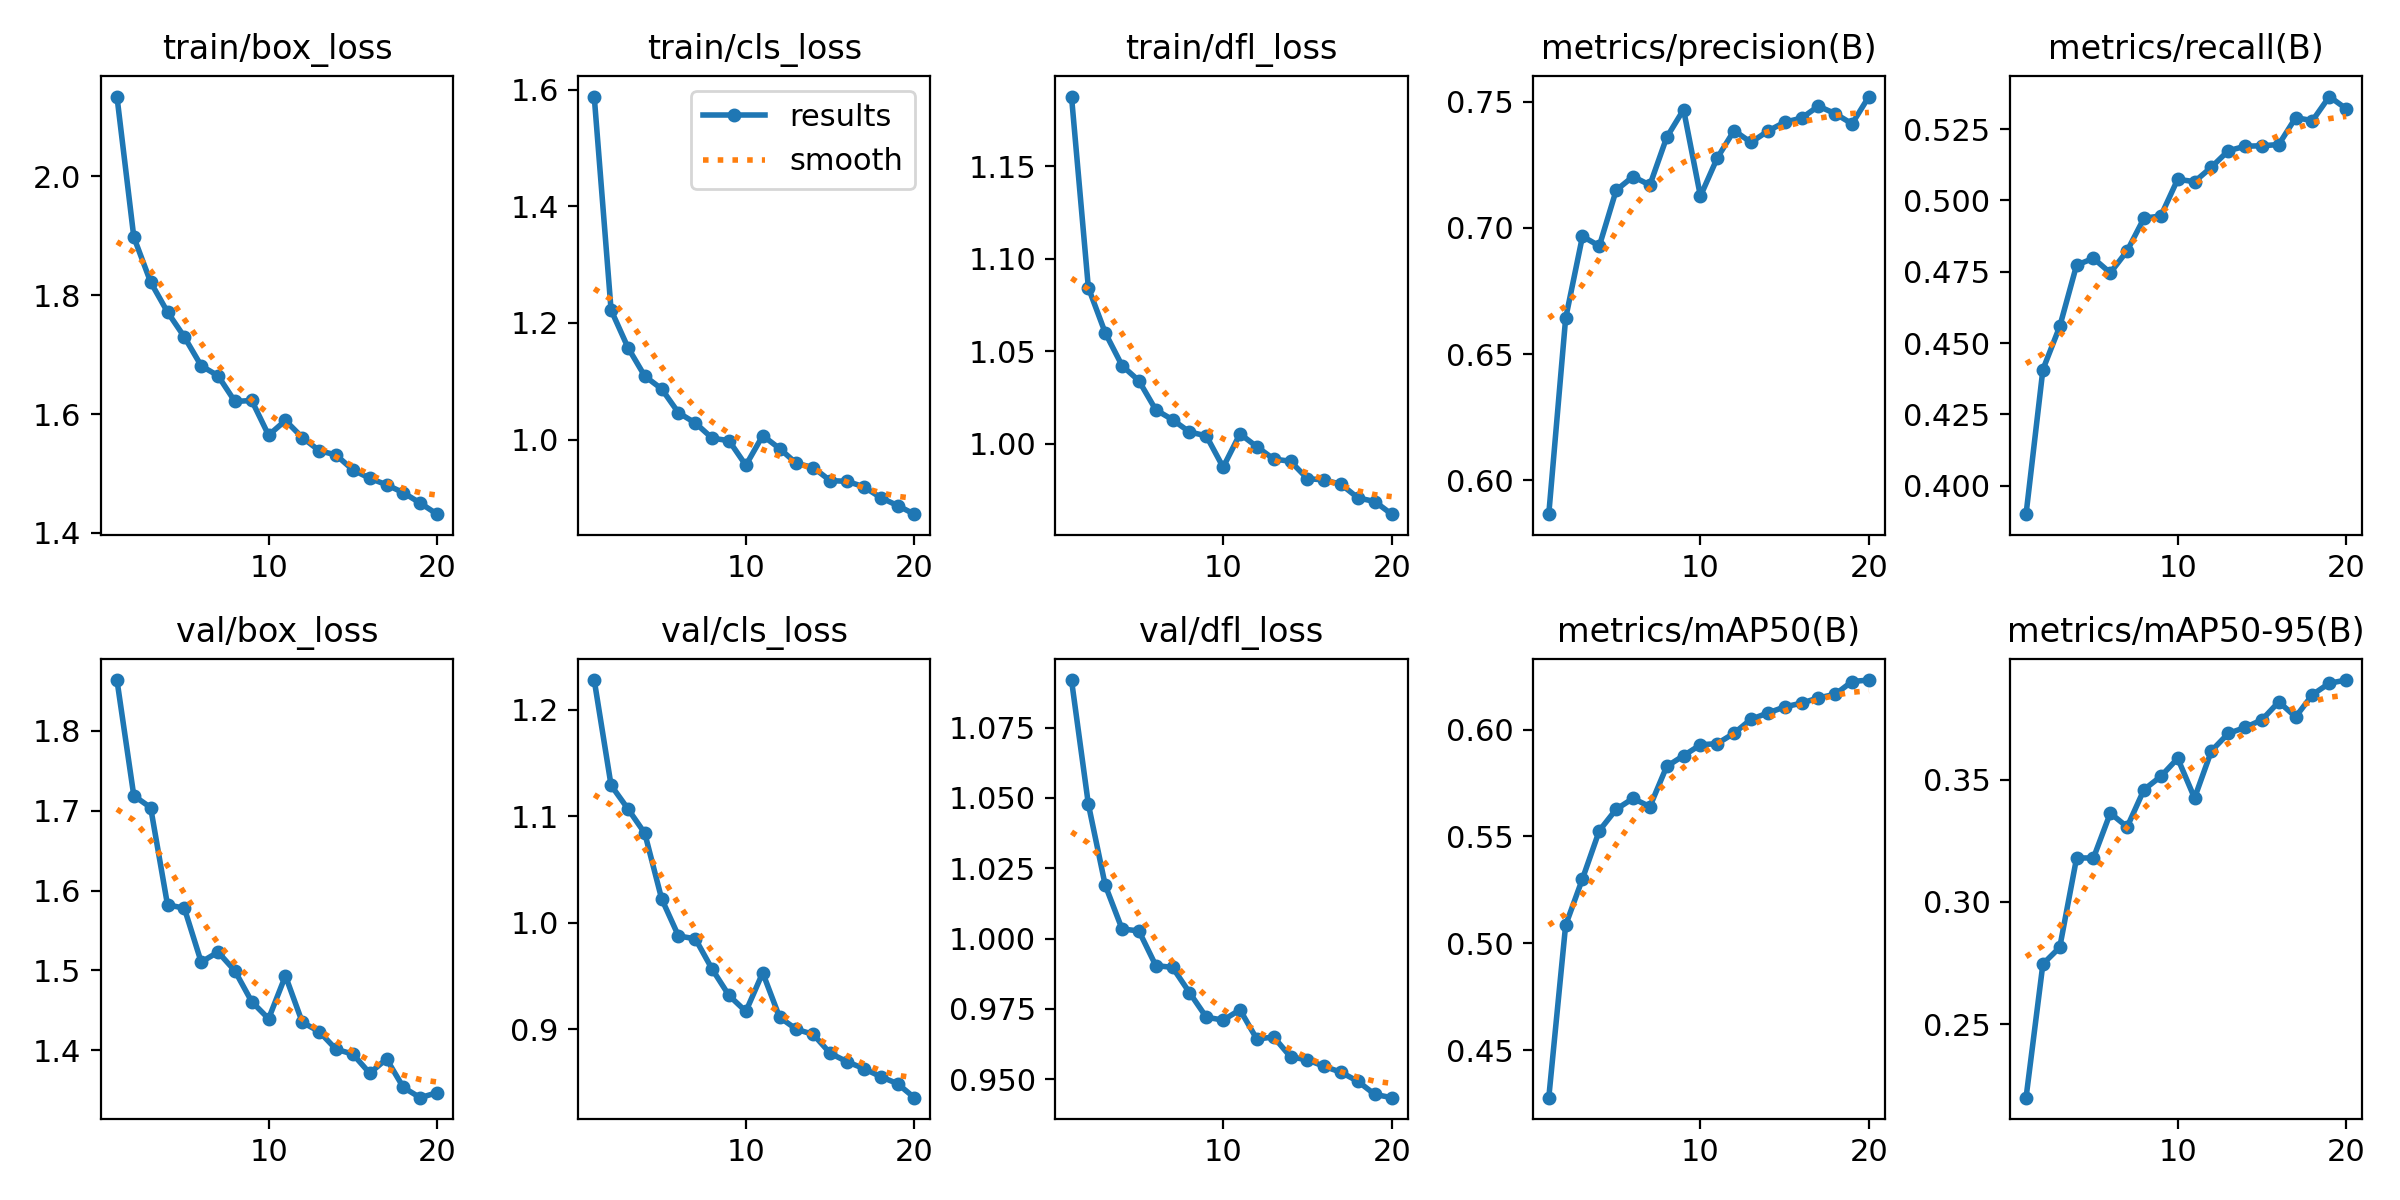

In [6]:
Image(filename='runs/detect/train2/results.png', width=600)

## Validation Loop

In this validation loop we will try to validate our trained models.  
Use the best checkpoint `best.pyt` for the training result in `runs` directory.

In [7]:
model = YOLO('runs/detect/train2/weights/best.pt')

The code below initialize webcam and continuous inference, we can measure inference performance by showing the FPS counter.

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        start = time.perf_counter()
        
        results = model(frame)
        end = time.perf_counter()
        
        total_time = end-start
        fps = 1/total_time
        
        
        annotated_frame = results[0].plot()
        
        cv2.putText(annotated_frame, f"FPS: {int(fps)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.imshow("YOLOv8 Inference", annotated_frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Finally, we can validate the model on our validation datasets using the code below, it will keep track of previous directory when training.

In [8]:
metrics = model.val()

Ultralytics YOLOv8.1.0 🚀 Python-3.8.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Projects\YOLO\datasets\Text-Detector-2-2\valid\labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.07s/it]


                   all        264      32259      0.752      0.535      0.625      0.395
Speed: 2.2ms preprocess, 32.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs\detect\val2
